<a href="https://colab.research.google.com/github/StephenCloud/Stephen/blob/main/Hamoye_Course_4_Lesson_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
print("Training data: {}, {}".format(train_images.shape, train_labels.shape))

Training data: (60000, 28, 28), (60000,)


In [3]:
print("Test data: {}, {}".format(test_images.shape, test_labels.shape))

Test data: (10000, 28, 28), (10000,)


In [4]:
class_labels = np.unique(train_labels)
print("There are {} classes in the dataset. They are: {}".format(len(class_labels),class_labels))

There are 10 classes in the dataset. They are: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
#Visualize the image

In [5]:
plt.figure(figsize=(8,5))

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

Text(0.5, 1.0, 'Label: 5')

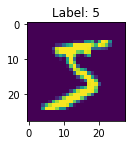

In [6]:
plt.subplot(1,3,1)
plt.imshow(train_images[0])
plt.title("Label: {}".format(train_labels[0]))

Text(0.5, 1.0, 'Label: 0')

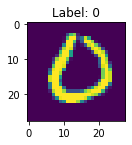

In [7]:
plt.subplot(1,3,2)
plt.imshow(train_images[2500])
plt.title("Label: {}".format(train_labels[2500]))

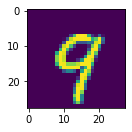

In [8]:
plt.subplot(1,3,3)
plt.imshow(test_images[12])

In [9]:
plt.show()

In [ ]:
#Scaling our dataset to range between o and 1 in this dataset the pixel value ranges from 0 abd 225
#Dividing the data by 255


In [10]:
train_images = train_images/255.0
test_images = test_images/ 255.0

In [ ]:
#Spliting training data to training and validation sets

In [11]:
x_train = train_images[0:50000]
x_val = train_images[50000:]
y_train = train_labels[0:50000]
y_val = train_labels[50000:]

In [12]:
print("x_train: {}".format(x_train.shape))
print("x_val: {}".format(x_val.shape))
print("y_train: {}".format(y_train.shape))
print("y_val: {}".format(y_val.shape))

x_train: (50000, 28, 28)
x_val: (10000, 28, 28)
y_train: (50000,)
y_val: (10000,)


In [ ]:
#Reshaping data from 28*28 array to single array

In [13]:
new_dimension = np.prod(train_images.shape[1:])
x_train = x_train.reshape(x_train.shape[0], new_dimension)
x_val = x_val.reshape(x_val.shape[0], new_dimension)
test_images = test_images.reshape(test_images.shape[0], new_dimension)

In [14]:
print("x_train: {}".format(x_train.shape))
print("x_val: {}".format(x_val.shape))
print("test_images: {}".format(test_images.shape))

x_train: (50000, 784)
x_val: (10000, 784)
test_images: (10000, 784)


In [ ]:
#Encode labels to categorical variables 

In [15]:
from tensorflow.keras.utils import to_categorical
no_labels = 10
y_train = to_categorical(y_train, no_labels)
y_val = to_categorical(y_val, no_labels)
y_test = to_categorical(test_labels, no_labels)

In [ ]:
#Activation functions and Neurals Networks Hyperparameters

In [ ]:
X = tf.placeholder(tf.float32, [none, new_dimension])
Y = tf.placeholder(tf.float32, [none, no_labels])

AttributeError: ignored

In [17]:
#Create a Model Architecture 
def multilayer_perceptron(x, no_classes, first_layer_neurons=256, second_layer_neurons=128):

SyntaxError: ignored

In [18]:
#First Layer 
first_weight = tf.Variable(tf.random_uniform([new_dimension, first_layer_neurons]))
first_bias = tf.Variable(tf.zeros([first_layer_neurons]))
first_layer_output = tf.nn.relu(tf.add(tf.matmul(x, first_weight), first_bias))

AttributeError: ignored

In [ ]:
#Second layer 
second_weight = tf.Variable(tf.random_unifom([first_layer_neurons, second_layer_neurons]))
second_bias = tf.Variable(tf.zeros([second_layer_neurons]))
second_layer_output = tf.nn.relu(tf.add(tf.matmul(first_layer_output, second_weight),
                                        second_bias))

In [ ]:
#Output layer
final_weight = tf.Variable(tf.random_uniform([second_layer_neurons, no_classes]))
final_bias = tf.Variable(tf.zeos([no_classes]))
logits = tf.add(tf.matmul(second_layer_output, final_weight), final_bias)

In [ ]:
return logits

In [ ]:
#Call the Multilayer Perceptron Function 

In [ ]:
logits = multilayer_preceptron(x, no_labels)


In [ ]:
learning_rate = 0.01

#we define the loss and optimiser for the network
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimiser tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimiser.minimize(loss_op)

In [ ]:
#Initialize the Variables
init = tf.global_variables_initializer()

epochs = 20
batch_size = 1000
iteration = len(x_train) // batch_size

In [ ]:
#Train Model
with tf.Session() as session: 
  session.run(init)
  for epoch in range(epochs):
    average_cost = 0
    start, end = 0, batch_size

    for i in range(iteration):
      batch_x, batch_y = x_train[start: end], y_train[start: end]
      _, loss = session.run([train_op, loss_op], feed_dict={x: batch_x, y: batch_y})
      start += batch_size
      end += batch_size

In [ ]:
#Average loss
average_cost += loss/iteration
print("Epoch========{}".format(epoch))

In [ ]:
#Evaluation Model
prediction = tf.nn.softmax(logits)
ground_truth = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(ground_truth, "float"))
print("Accuracy: {}".format(accuracy.eval({X:test_images, Y: y_test})))